# Assignment 4

This is an basecode for assignment 4 of Artificial Intelligence class (CSCE-4613), Spring 2025


In [32]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import time 
import numpy as np
from sklearn.metrics import confusion_matrix

## Binary Network

## Define a binary network class


In [33]:
class BinaryNetwork(nn.Module):
  def __init__(self):
    # YOUR CODE HERE
    super(BinaryNetwork, self).__init__()
    self.layer1 = nn.Linear(2, 4)  # Input size 2, hidden size 4
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(4, 1)  # Hidden size 4, output size 1
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    # x has the size of (batch size x 2)
    # YOUR CODE HERE
    x = self.layer1(x)
    x = self.relu(x)
    x = self.layer2(x)
    x = self.sigmoid(x)
    return x

### Define data generator

In [34]:
def generate_data(operator = "AND"):
  assert operator in ["AND", "OR", "XOR", "NOR"], "%s operator is not valid" % operator
  data = []
  label = []
  for i in range(2):
    for j in range(2):
      data.append([i, j])
      if operator == "AND":
        label.append(i & j)
      elif operator == "OR":
        label.append(i | j)
      elif operator == "XOR":
        label.append(i ^ j)
      else:
        label.append(not (i | j))
  data = torch.as_tensor(data, dtype = torch.float32)
  label = torch.as_tensor(label, dtype = torch.float32).unsqueeze(1)
  return data, label

### Define the training framework

BinaryNetwork(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
[5/5000]. Loss: 0.7428. Accuracy: 0.25
[10/5000]. Loss: 0.6547. Accuracy: 0.75
[15/5000]. Loss: 0.5684. Accuracy: 0.75
[20/5000]. Loss: 0.6399. Accuracy: 0.75
[25/5000]. Loss: 0.8605. Accuracy: 0.75
[30/5000]. Loss: 1.1036. Accuracy: 0.75
[35/5000]. Loss: 1.2885. Accuracy: 0.75
[40/5000]. Loss: 1.3781. Accuracy: 0.75
[45/5000]. Loss: 1.3245. Accuracy: 0.75
[50/5000]. Loss: 1.0303. Accuracy: 0.75
[55/5000]. Loss: 1.0067. Accuracy: 0.25
[60/5000]. Loss: 2.6053. Accuracy: 0.25
[65/5000]. Loss: 0.3607. Accuracy: 1.00
[70/5000]. Loss: 0.5912. Accuracy: 0.75
[75/5000]. Loss: 0.5746. Accuracy: 0.75
[80/5000]. Loss: 0.5677. Accuracy: 0.75
[85/5000]. Loss: 0.6527. Accuracy: 0.75
[90/5000]. Loss: 0.8101. Accuracy: 0.75
[95/5000]. Loss: 0.9625. Accuracy: 0.75
[100/5000]. Loss: 1.0492. Accuracy: 0.75
[105/5000]. Loss: 1.0

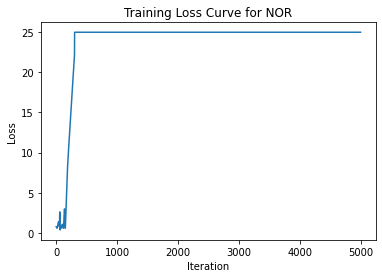

In [52]:
model = BinaryNetwork()
model.train()
print(model)
operator = "NOR"
inputs, labels = generate_data(operator = operator)

n_iters = 5000
learning_rate = 0.01

optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
criterion = nn.BCELoss()

losses = []

for i in range(1, n_iters + 1):

  # WRITE YOUR CODE TO COMPUTE OUTPUTS, LOSS, ACCURACY, AND OPTIMIZE MODEL
  outputs = model(inputs)
  loss = criterion(outputs, labels)
  loss.backward()
  optim.step()

  losses.append(loss.item())

  predictions = (outputs > 0.5).float()
  accuracy = (predictions == labels).float().mean().item()
  # optimize the model
  # loss = 0.0
  # accuracy = 0.0

  if i % 5 == 0:
    print("[%d/%d]. Loss: %0.4f. Accuracy: %0.2f" % (i, n_iters, loss, accuracy))

model.eval()
# WRITE YOUR CODE TO CALCULATE THE FINAL ACCURACY
# accuracy = ???
with torch.no_grad():
    outputs = model(inputs)
    predictions = (outputs > 0.5).float()
    accuracy = (predictions == labels).float().mean().item()
print("Final Accuracy: %0.2f" % (accuracy))

# Plot training loss curve
plt.plot(losses)
plt.title("Training Loss Curve for {}".format(operator))
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

torch.save(model.state_dict(), "%s_Network.pth" % operator)
  # model.load_state_dict(torch.load("%s_Network.pth" % operator)) # Load model in the next time you use

## Digit Classification

### Define Digit Classification Network

In [36]:
class DigitNetwork(nn.Module):
  def __init__(self):
    super(DigitNetwork, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
    self.relu = nn.ReLU()
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(64 * 14 * 14, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    # x has the size of (batch size x 1 x height x height)
    # YOUR CODE HERE
    x = self.conv1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.pool(x)
    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x

### Define Data Generator

In [37]:
def create_data_generator(batch_size = 32, root = "data"):
  train_dataset = torchvision.datasets.MNIST(root = root,
                                             train = True,
                                             transform = torchvision.transforms.ToTensor(),
                                             download = True)
  test_dataset = torchvision.datasets.MNIST(root = root,
                                             train = False,
                                             transform = torchvision.transforms.ToTensor(),
                                             download = True)
  train_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size = batch_size,
                                             shuffle = True)
  test_loader = torch.utils.data.DataLoader(test_dataset,
                                             batch_size = batch_size,
                                             shuffle = False)
  return train_loader, test_loader

### Define the training framework

In [38]:
cuda = torch.cuda.is_available()
batch_size = 32
train_loader, test_loader = create_data_generator(batch_size)
model = DigitNetwork()
print(model)
if cuda:
  model.cuda()
n_epochs = 10
learning_rate = 0.1
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

losses = []
accuracies = []
start_time = time.time()
batch_times = []

model.train()
for epoch in range(1, n_epochs + 1):
  for idx, (images, labels) in enumerate(train_loader):
    # WRITE YOUR CODE TO COMPUTE OUTPUTS, LOSS, ACCURACY, AND OPTIMIZE MODEL
    # outptus = ???
    # loss = ???
    # accuracy = ???
    # optimize the model
      running_loss = 0
      total = 0
      
      if cuda:
          images, labels = images.cuda(), labels.cuda()
      
      optim.zero_grad()
      outputs = model(images)
      loss = loss_fn(outputs, labels)
      loss.backward()
      optim.step()
      
      running_loss += loss.item()
      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      accuracy = (predicted == labels).float().mean().item()

      batch_times.append(time.time() - start_time)

      if idx % 100 == 0:
        print("Epoch [%d/%d]. Iter [%d/%d]. Loss: %0.2f. Accuracy: %0.2f" % (epoch, n_epochs, idx + 1, len(train_loader), loss, accuracy))

  losses.append(running_loss / len(train_loader))
  accuracies.append(accuracy)

torch.save(model.state_dict(), "MNIST_Network.pth")

DigitNetwork(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12544, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
Epoch [1/10]. Iter [1/1875]. Loss: 2.30. Accuracy: 0.19
Epoch [1/10]. Iter [101/1875]. Loss: 0.37. Accuracy: 0.94
Epoch [1/10]. Iter [201/1875]. Loss: 0.54. Accuracy: 0.91
Epoch [1/10]. Iter [301/1875]. Loss: 0.29. Accuracy: 0.94
Epoch [1/10]. Iter [401/1875]. Loss: 0.26. Accuracy: 0.91
Epoch [1/10]. Iter [501/1875]. Loss: 0.10. Accuracy: 0.97
Epoch [1/10]. Iter [601/1875]. Loss: 0.00. Accuracy: 1.00
Epoch [1/10]. Iter [701/1875]. Loss: 0.17. Accuracy: 0.97
Epoch [1/10]. Iter [801/1875]. Loss: 0.56. Accuracy: 0.88
Epoch [1/10]. Iter [901/1875]. Loss: 0.16. Accuracy: 0.97
Epoch [1/10]. Iter [1001/1

Total Training Time: 142.68 seconds
Average Batch Time: 70.9676 seconds


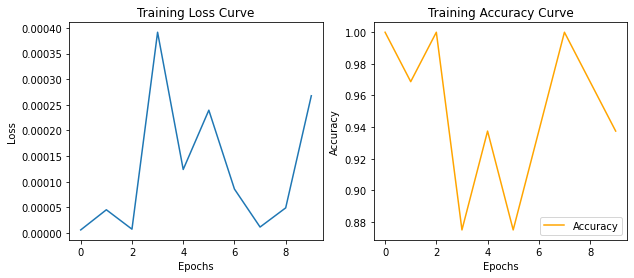

In [39]:
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f} seconds")
print(f"Average Batch Time: {np.mean(batch_times):.4f} seconds")

# Plot training loss and accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(losses, label='Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(accuracies, label='Accuracy', color='orange')
plt.title('Training Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Define the evaluation framework

In [40]:
cuda = torch.cuda.is_available()
batch_size = 1
train_loader, test_loader = create_data_generator(batch_size)
model = DigitNetwork()
if cuda:
  model.cuda()
model.eval()
model.load_state_dict(torch.load("MNIST_Network.pth"))

total_accuracy = 0.0
num_samples = 0
all_labels = []
all_preds = []
samples = []

for idx, (images, labels) in enumerate(test_loader):
  # WRITE YOUR CODE TO COMPUTE ACCURACY
  # accuracy = ???
  if cuda:
      images, labels = images.cuda(), labels.cuda()
  
  with torch.no_grad():
      outputs = model(images)
      _, predicted = torch.max(outputs, 1)
      accuracy = (predicted == labels).float().mean().item()
      total_accuracy += accuracy
      num_samples += 1
      all_preds.extend(predicted.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

      # Collect samples with predictions and confidence scores
      probs = torch.softmax(outputs, dim=1)
      for i in range(len(images)):
          samples.append((images[i].cpu(), predicted[i].item(), labels[i].item(), probs[i][predicted[i]].item()))

  if idx % 2000 == 0:
    print("Iter [%d/%d]. Accuracy: %0.2f" % (idx + 1, len(test_loader), accuracy))

print("Final Accuracy: %0.2f" % (total_accuracy / len(test_loader)))

C:\Users\Simon\AppData\Local\Temp\ipykernel_18540\741799708.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("MNIST_Network.pth"))


Iter [1/10000]. Accuracy: 1.00
Iter [2001/10000]. Accuracy: 1.00
Iter [4001/10000]. Accuracy: 0.00
Iter [6001/10000]. Accuracy: 0.00
Iter [8001/10000]. Accuracy: 1.00
Final Accuracy: 0.94


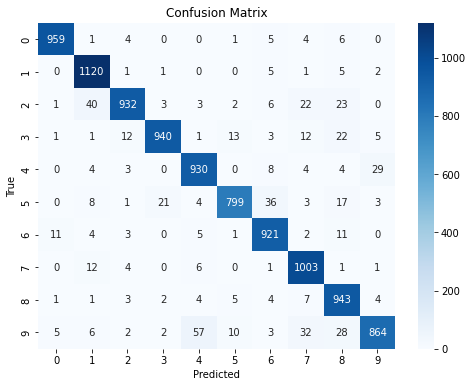

Inference Time per Sample: 0.000999 seconds


In [41]:
import seaborn as sns
# Confusion matrix visualization
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Inference time measurement
sample_image, _ = next(iter(test_loader))
sample_image = sample_image.cuda() if cuda else sample_image
start_time = time.time()
with torch.no_grad():
    model(sample_image)
inference_time = time.time() - start_time
print(f"Inference Time per Sample: {inference_time:.6f} seconds")

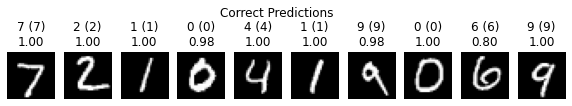

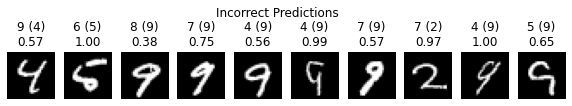

In [42]:
# Visualizing Correct and Incorrect Predictions
correct_samples = [s for s in samples if s[1] == s[2]][:10]
incorrect_samples = [s for s in samples if s[1] != s[2]][:10]

def plot_samples(samples, title):
    plt.figure(figsize=(10,2))
    for i, (img, pred, true, conf) in enumerate(samples):
        plt.subplot(1, 10, i+1)
        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(f"{pred} ({true})\n{conf:.2f}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_samples(correct_samples, "Correct Predictions")
plot_samples(incorrect_samples, "Incorrect Predictions")

## Backpropagation

### ReLU Example

In [43]:
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-defining-new-autograd-functions
class MyReLU(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

#### Sigmoid Function


In [48]:
class MySigmoid(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        # input is a N x C tensor, N is the batch size, C is the dimension of input
        ctx.save_for_backward(input)
        # YOUR CODE HERE
        output = 1 / (1 + torch.exp(-input))
        return output

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        # YOUR CODE HERE
        sigmoid_output = 1 / (1 + torch.exp(-input))
        grad_input = grad_output * sigmoid_output * (1 - sigmoid_output)  # Derivative of sigmoid
        return grad_input

#### Fully Connected Layer

In [49]:
class MyLinearFunction(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input, weights, bias):
        # input is a N x C tensor, N is the batch size, C is the dimension of input
        # weights is a C x D tensor, C and D are the dimension out input and ouput
        # bias is D tensor
        ctx.save_for_backward(input, weights, bias)
        # YOUR CODE HERE
        output = torch.mm(input, weights) + bias  # Linear transformation
        return output


    @staticmethod
    def backward(ctx, grad_output):
        input, weights, bias = ctx.saved_tensors
        # YOUR CODE HERE
        grad_input = torch.mm(grad_output, weights.t())  # Derivative w.r.t. input
        grad_weights = torch.mm(input.t(), grad_output)  # Derivative w.r.t. weights
        grad_bias = grad_output.sum(0)  # Derivative w.r.t. bias
        return grad_input, grad_weights, grad_bias

class MyLinearLayer(nn.Module):
  # You don't modify this layer
  def __init__(self, in_features = 2, out_features = 4):
    super(MyLinearLayer, self).__init__()
    self.weights = nn.Parameter(torch.randn(in_features, out_features))
    self.bias = nn.Parameter(torch.zeros(out_features))
    self.linear_fn = MyLinearFunction.apply

  def forward(self, input):
    return self.linear_fn(input, self.weights, self.bias)


#### Testing Your Implementation

In [50]:
class MyLinearNetwork(nn.Module):
  def __init__(self):
    super(MyLinearNetwork, self).__init__()
    self.linear_1 = MyLinearLayer(28 * 28, 128)
    self.sigmoid_fn = MySigmoid.apply
    self.linear_2 = MyLinearLayer(128, 10)
    self.softmax_fn = nn.Softmax(dim=1)

  def forward(self, x):
    size = x.size()
    x = x.reshape(size[0], -1) # Flatten images
    x = self.linear_1(x)
    x = self.sigmoid_fn(x)
    x = self.linear_2(x)
    if self.training == False:
      x = self.softmax_fn(x)
    return x

In [51]:
cuda = torch.cuda.is_available()
batch_size = 64
train_loader, test_loader = create_data_generator(batch_size)
model = MyLinearNetwork()
print(model)
if cuda:
  model.cuda()
n_epochs = 300
learning_rate = 0.01
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

model.train()
for epoch in range(1, n_epochs + 1):
  for idx, (images, labels) in enumerate(train_loader):
    # WRITE YOUR CODE TO COMPUTE OUTPUTS, LOSS, ACCURACY, AND OPTIMIZE MODEL
    if cuda:
        images, labels = images.cuda(), labels.cuda()

    optim.zero_grad()
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optim.step()

    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == labels).float().mean().item()

    if idx % 100 == 0:
      print("Epoch [%d/%d]. Iter [%d/%d]. Loss: %0.2f. Accuracy: %0.2f" % (epoch, n_epochs, idx + 1, len(train_loader), loss, accuracy))

num_samples = 0
total_accuracy = 0.0
model.eval()
for idx, (images, labels) in enumerate(test_loader):
  # WRITE YOUR CODE TO COMPUTE ACCURACY
  if cuda:
      images, labels = images.cuda(), labels.cuda()

  with torch.no_grad():
      outputs = model(images)
      _, predicted = torch.max(outputs, 1)
      accuracy = (predicted == labels).float().mean().item()

  total_accuracy += accuracy
  num_samples += 1

  if idx % 2000 == 0:
    print("Iter [%d/%d]. Accuracy: %0.2f" % (idx + 1, len(test_loader), accuracy))

print("Final Accuracy: %0.2f" % (total_accuracy / len(test_loader)))

MyLinearNetwork(
  (linear_1): MyLinearLayer()
  (linear_2): MyLinearLayer()
  (softmax_fn): Softmax(dim=1)
)
Epoch [1/300]. Iter [1/938]. Loss: 9.59. Accuracy: 0.22
Epoch [1/300]. Iter [101/938]. Loss: 2.09. Accuracy: 0.44
Epoch [1/300]. Iter [201/938]. Loss: 2.01. Accuracy: 0.53
Epoch [1/300]. Iter [301/938]. Loss: 1.22. Accuracy: 0.69
Epoch [1/300]. Iter [401/938]. Loss: 1.39. Accuracy: 0.73
Epoch [1/300]. Iter [501/938]. Loss: 0.81. Accuracy: 0.77
Epoch [1/300]. Iter [601/938]. Loss: 1.01. Accuracy: 0.75
Epoch [1/300]. Iter [701/938]. Loss: 0.94. Accuracy: 0.72
Epoch [1/300]. Iter [801/938]. Loss: 0.82. Accuracy: 0.80
Epoch [1/300]. Iter [901/938]. Loss: 0.82. Accuracy: 0.73
Epoch [2/300]. Iter [1/938]. Loss: 0.77. Accuracy: 0.75
Epoch [2/300]. Iter [101/938]. Loss: 0.63. Accuracy: 0.83
Epoch [2/300]. Iter [201/938]. Loss: 0.86. Accuracy: 0.80
Epoch [2/300]. Iter [301/938]. Loss: 0.56. Accuracy: 0.89
Epoch [2/300]. Iter [401/938]. Loss: 0.83. Accuracy: 0.80
Epoch [2/300]. Iter [501